# Data Analysis

## 1. Importazione delle librerie necessarie

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## 2. Caricamento del dataset CIFAR-10

###  Definisco una trasformazione minima solo per ottenere i dati come Tensor

In [18]:
transform = transforms.Compose([transforms.ToTensor()])-

### Carico i dataset di train e validation

In [19]:
train_dataset = datasets.CIFAR10(root='notebooks', train=True, download=True, transform=transform)
val_dataset = datasets.CIFAR10(root='notebooks', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


## 3. Creazione di un DataFrame con informazioni sulle immagini
### Recupera nomi delle classi


In [20]:
class_names = train_dataset.classes

### Crea liste per i DataFrame

In [21]:
data = []
for img, label in train_dataset:
    # Aggiungi dati nel formato [classe, dimensioni, media_pixel, deviazione_standard_pixel]
    data.append({
        'label': class_names[label],
        'width': img.shape[2],
        'height': img.shape[1],
        'mean_pixel_value': img.mean().item(),
        'std_pixel_value': img.std().item()
    })

### Crea un dataframe

In [22]:
df = pd.DataFrame(data)

## 4. Visualizzazione dei primi 5 record del DataFrame

In [23]:
df.head()

,label,width,height,mean_pixel_value,std_pixel_value
0,frog,32,32,0.405676,0.203852
1,truck,32,32,0.511166,0.237212
2,truck,32,32,0.524473,0.323830
3,deer,32,32,0.314605,0.143050
4,automobile,32,32,0.405784,0.237488


## 5. Analisi statistica  del dataframe

In [24]:
df.describe()

,width,height,mean_pixel_value,std_pixel_value
count,50000.0,50000.0,50000.000000,50000.000000
mean,32.0,32.0,0.473363,0.211084
std,0.0,0.0,0.125266,0.055270
min,32.0,32.0,0.030917,0.037754
25%,32.0,32.0,0.389812,0.171668
50%,32.0,32.0,0.466263,0.209546
75%,32.0,32.0,0.548362,0.248400
max,32.0,32.0,0.989399,0.451022


## 6. Distribuzione delle classi
### Visualizza la distribuzione delle classi nel dataset

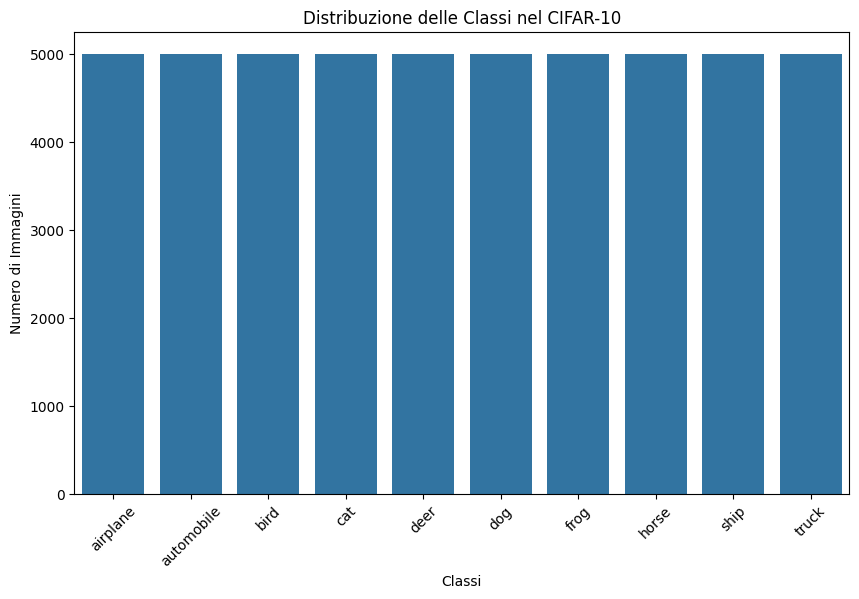

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, order=class_names)
plt.xticks(rotation=45)
plt.title('Distribuzione delle Classi nel CIFAR-10')
plt.xlabel('Classi')
plt.ylabel('Numero di Immagini')
plt.show()

## 7. Analisi delle dimensioni delle immagini
### Mostra la distribuzione di larghezza e altezza delle immagini

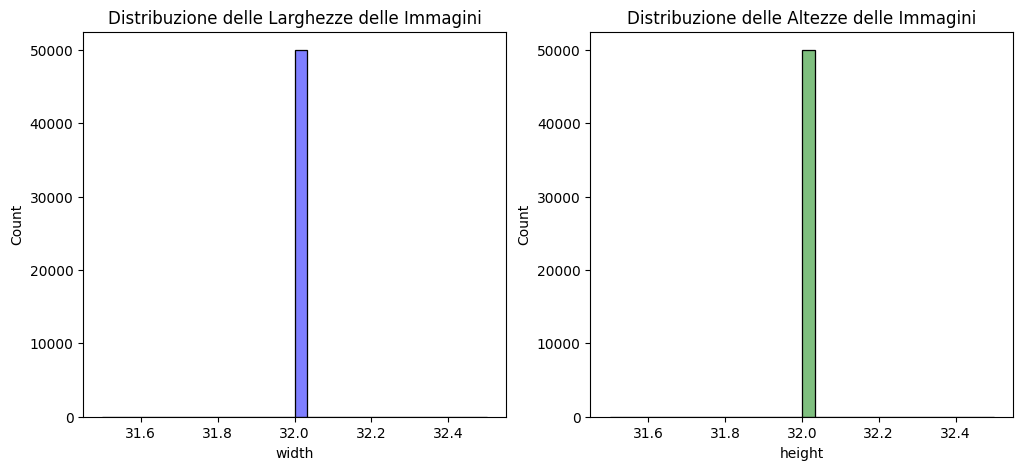

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['width'], kde=True, bins=30, color='blue')
plt.title('Distribuzione delle Larghezze delle Immagini')

plt.subplot(1, 2, 2)
sns.histplot(df['height'], kde=True, bins=30, color='green')
plt.title('Distribuzione delle Altezze delle Immagini')
plt.show()

## 8. Analisi delle statistiche dei pixel
### Media e deviazione standard dei pixel

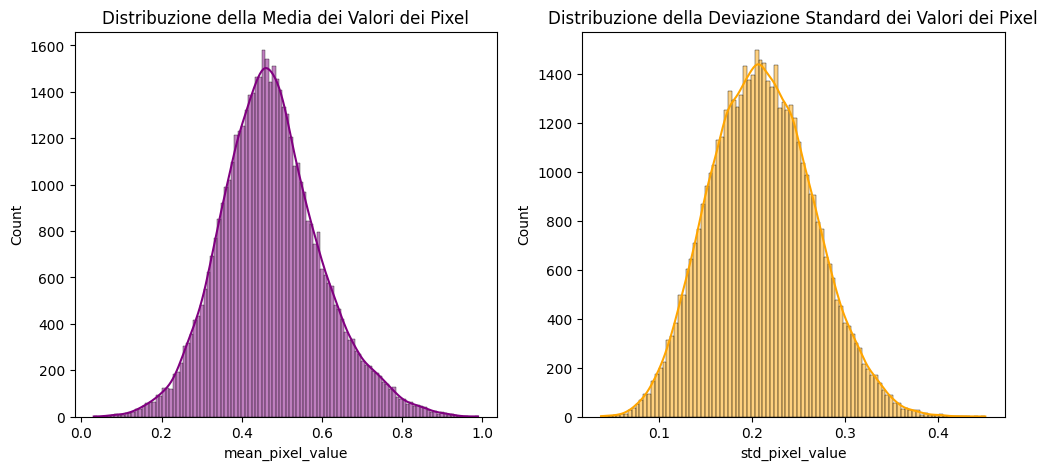

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['mean_pixel_value'], kde=True, color='purple')
plt.title('Distribuzione della Media dei Valori dei Pixel')

plt.subplot(1, 2, 2)
sns.histplot(df['std_pixel_value'], kde=True, color='orange')
plt.title('Distribuzione della Deviazione Standard dei Valori dei Pixel')
plt.show()